Name : Silva G.B.N.M. <br>
Index No : 190592X

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from plyfile import PlyData,PlyElement

Q1

In [5]:
pcd = PlyData.read(r'images/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis = 0)
points = points - np.mean(points,axis = 1).reshape(3,1)

Text(0.5, 0, 'z')

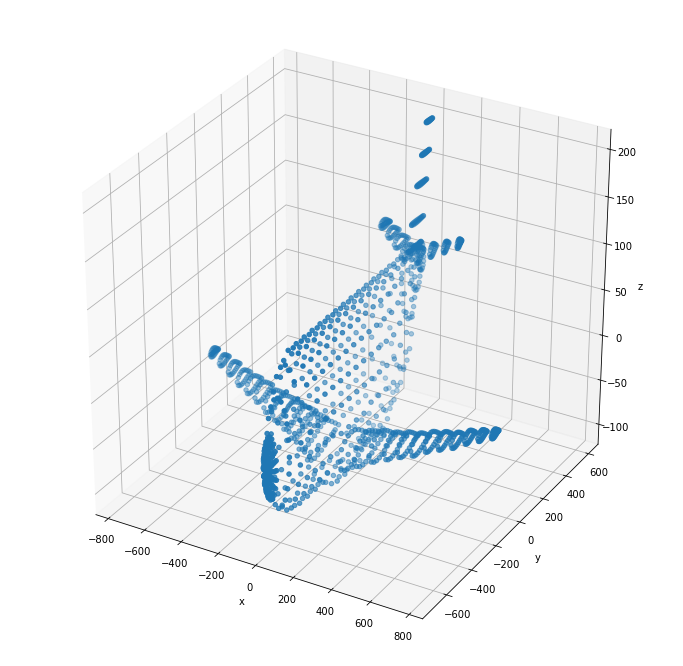

In [6]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

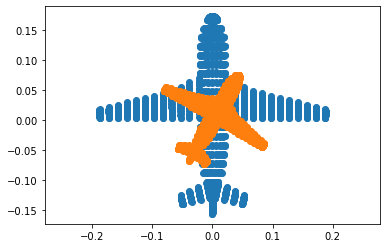

In [7]:
ones = np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis =1)

R = np.array([[0.866,0.5,0],[-0.5,0.866,0],[0,0,1]])#
K=np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])#K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t),axis=1)
X1 = P1 @ X
X1 = X1/X1[2,:]
X2 = P2 @ X
X2 = X2/X2[2,:]

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()

Q3

Item  1  ,area in pixesls =  59143
Item  1  ,area in mm^2 =  2318.642172
Item  2  ,area in pixesls =  59211
Item  2  ,area in mm^2 =  2321.3080440000003


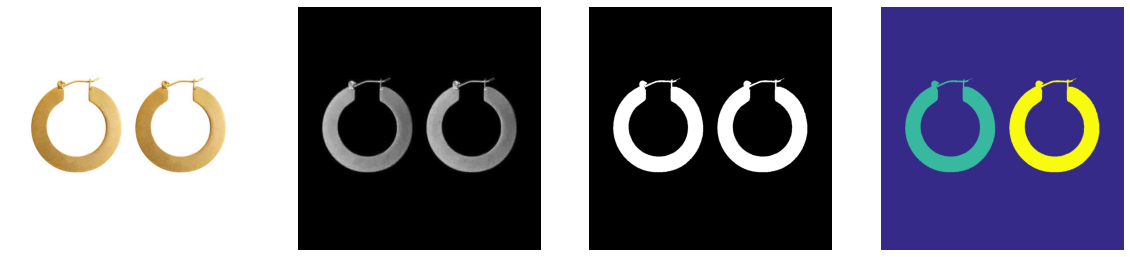

In [3]:
im = cv.imread(r'images/earrings.jpg',cv.IMREAD_COLOR)
hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

w= 5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval,labels,stats,centroids = cv.connectedComponentsWithStats(bw)
colorMapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

Z = 720
f = 8
for i,s in enumerate(stats):
    if i != 0 :
        print('Item ',i,' ,area in pixesls = ',s[4])
        print('Item ',i,' ,area in mm^2 = ',s[4]*(2.2e-3)**2*(Z**2)/(f**2))

cv.imshow('Images',im)
cv.waitKey(0)
cv.imshow('Images',hsv[:,:,1])
cv.waitKey(0)
cv.imshow('Images',bw)
cv.waitKey(0)
cv.imshow('Images',opened)
cv.waitKey(0)
cv.imshow('Images',colorMapped)
cv.waitKey(0)
cv.destroyAllWindows()

figure, axis = plt.subplots(1,4, figsize = (20,20))
axis[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[1].imshow(cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
axis[2].axis('off')
axis[3].imshow(cv.cvtColor(colorMapped, cv.COLOR_BGR2RGB))
axis[3].axis('off')
plt.show()

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
#file_name = 'images/allenkeys.jpg'
im = cv.imread (r'images/allenkeys.jpg' , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny(im, 50 , 150)

canny_color = cv.cvtColor(canny , cv .COLOR_GRAY2BGR)

lines = cv .HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)

if lines is not None :
    for i in range(0 , len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)),int(y0 + 1000*(a) ) )
        pt2 = (int( x0 - 1000*(-b ) ) , int ( y0 - 1000*(a ) ) )
        cv.line(canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv .LINE_AA)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',im)
cv.waitKey(0)
cv.imshow('Image',canny)
cv.waitKey(0)
cv.imshow('Image',canny_color )
r  =  cv.selectROI('Image',canny_color ,showCrosshair = True,fromCenter =False  ) 
cv.waitKey(0)
print(r)

x0,y0 = int(r[0]+r[2]/2),int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[:,0,1]))
c = y0 - m*x0 # Inter cept

cv.line(canny_color,(0,int(c)),(im.shape[0],int(m*im.shape[0]+c)),(0,255,0),2,cv.LINE_AA)

cv.imshow('Image',canny_color)
cv.waitKey(0)
cv.destroyAllWindows()

dy = 1
y_sub_pixel = np.arange(0,im.shape[0] - 1 , dy )
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)
# https : / / youtu . be / v9CFu4r6tPY
for i,y in enumerate (y_sub_pixel):
    # Your code hear to generate the pixe l values along the l ine
    break
fig,ax = plt.subplots(figsize=(30 ,5) )
ax . plot ( f_sub_pixel_nn )